In [11]:
from sklearn.decomposition import PCA
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set()
import pandas as pd
%matplotlib inline 


In [12]:
feature_files = open("dermatology.txt", "r")

feature_names = []

i = 0

for line in feature_files:
    feature_names.append(str(line.replace("\n", "").title()))
    i+=1
    print("{} - {}".format(i, line.title()))

liver_data = pd.read_csv('dermatology.data', na_values=['?'], names = feature_names)

liver_data = liver_data.iloc[2:] # Eliminating the first two lines
liver_data.fillna(0)
liver_data.head()

1 - Erythema

2 - Scaling

3 - Definite Borders

4 - Itching

5 - Koebner Phenomenon

6 - Polygonal Papules

7 - Follicular Papules

8 - Oral Mucosal Involvement

9 - Knee And Elbow Involvement

10 - Scalp Involvement

11 - Family History, (0 Or 1)

12 - Histopathological Attributes

13 - Melanin Incontinence

14 - Eosinophils In The Infiltrate

15 - Pnl Infiltrate

16 - Fibrosis Of The Papillary Dermis

17 - Exocytosis

18 - Acanthosis

19 - Hyperkeratosis

20 - Parakeratosis

21 - Clubbing Of The Rete Ridges

22 - Elongation Of The Rete Ridges

23 - Thinning Of The Suprapapillary Epidermis

24 - Spongiform Pustule

25 - Munro Microabcess

26 - Focal Hypergranulosis

27 - Disappearance Of The Granular Layer

28 - Vacuolisation And Damage Of Basal Layer

29 - Spongiosis

30 - Saw-Tooth Appearance Of Retes

31 - Follicular Horn Plug

32 - Perifollicular Parakeratosis

33 - Inflammatory Monoluclear Inflitrate

34 - Band-Like Infiltrate

35 - Cancer



,Erythema,Scaling,Definite Borders,Itching,Koebner Phenomenon,Polygonal Papules,Follicular Papules,Oral Mucosal Involvement,Knee And Elbow Involvement,Scalp Involvement,...,Focal Hypergranulosis,Disappearance Of The Granular Layer,Vacuolisation And Damage Of Basal Layer,Spongiosis,Saw-Tooth Appearance Of Retes,Follicular Horn Plug,Perifollicular Parakeratosis,Inflammatory Monoluclear Inflitrate,Band-Like Infiltrate,Cancer
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3
5,2,3,2,0,0,0,0,0,0,0,...,0,0,2,0,0,0,1,0,41,2
6,2,1,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,18,5


In [13]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(liver_data)
print(liver_data.shape)
print(projected.shape)

(356, 35)
(356, 2)


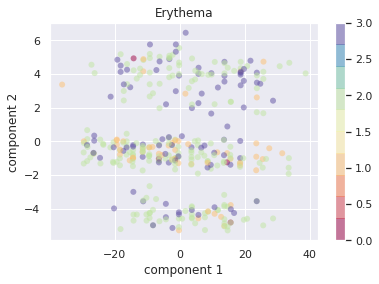

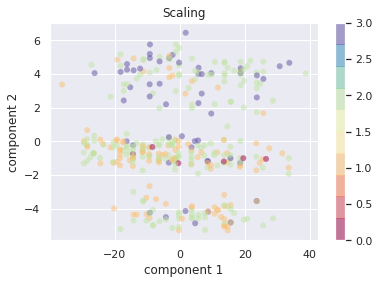

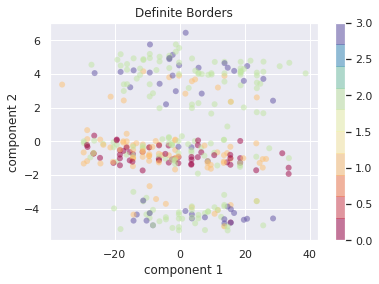

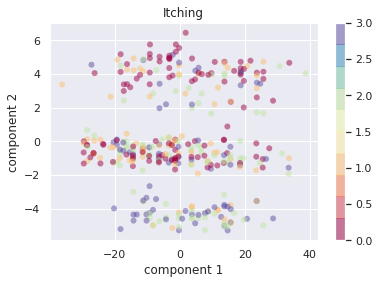

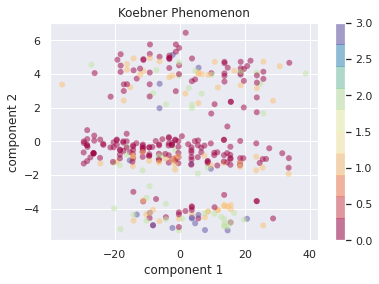

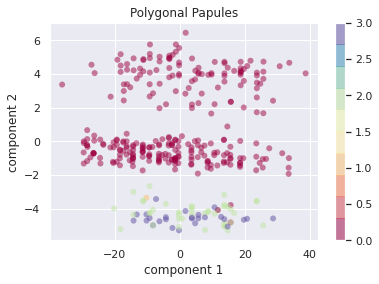

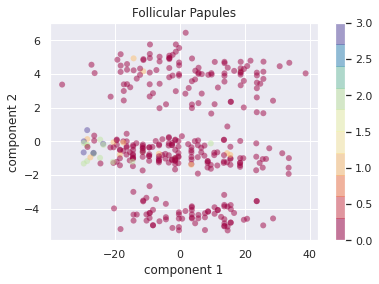

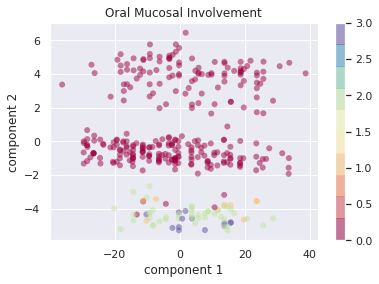

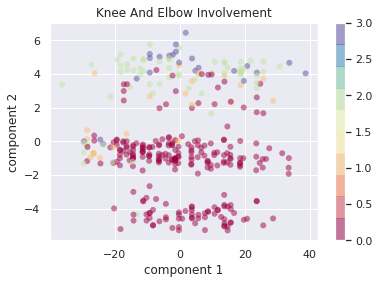

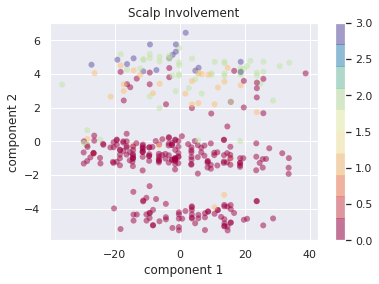

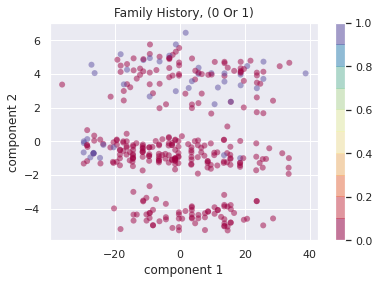

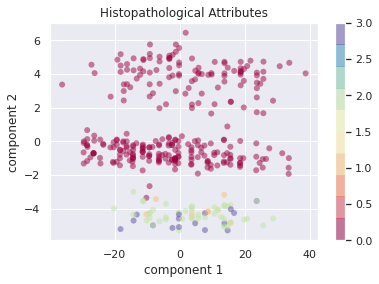

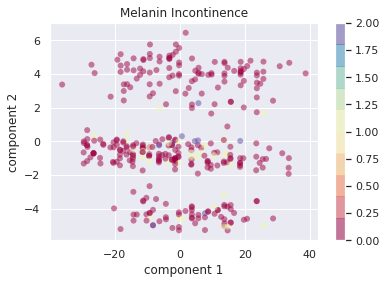

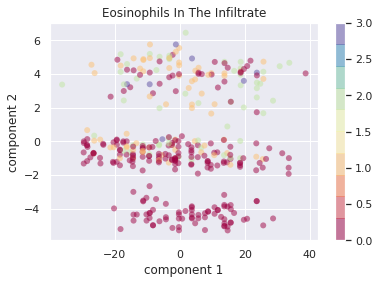

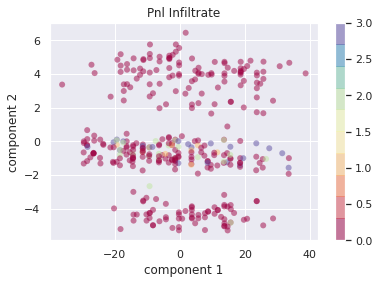

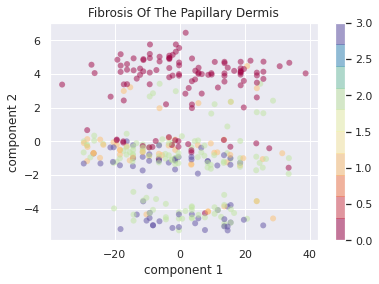

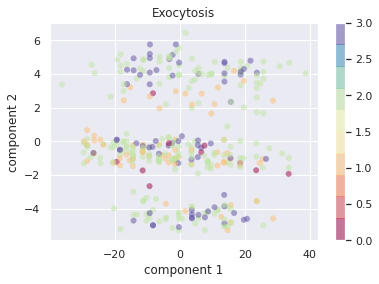

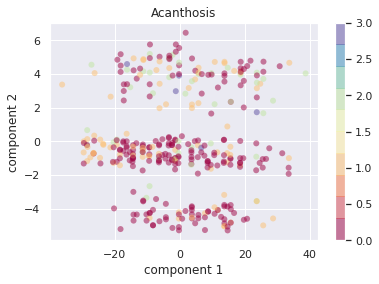

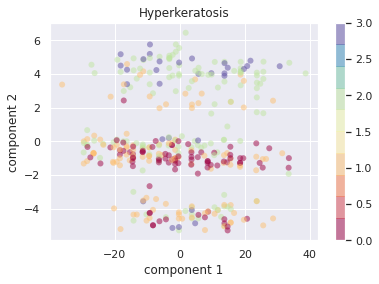

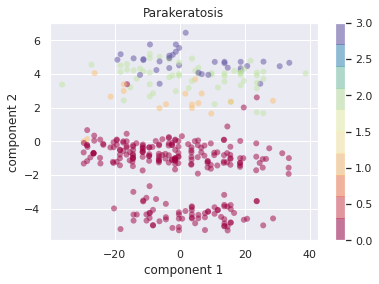

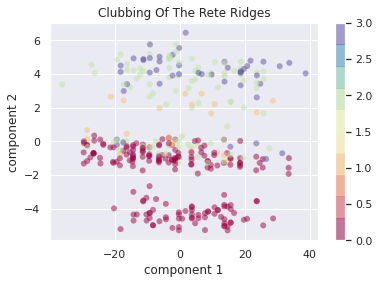

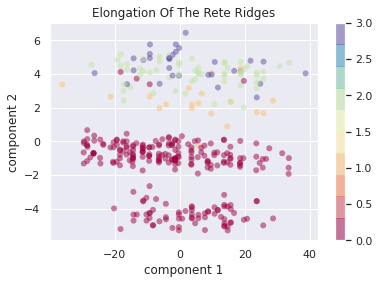

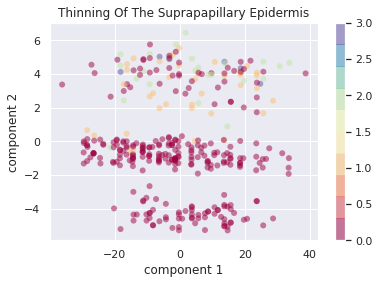

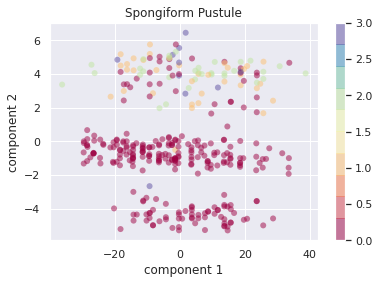

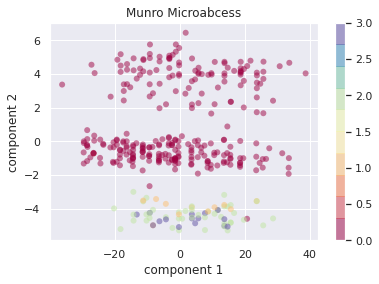

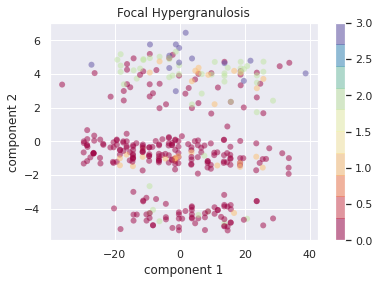

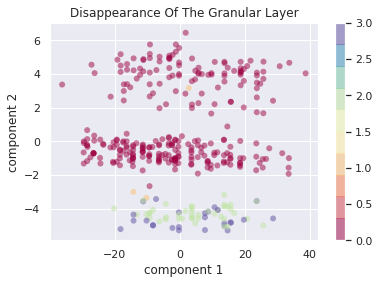

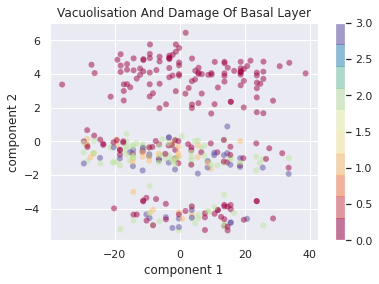

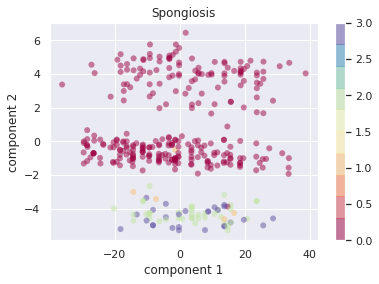

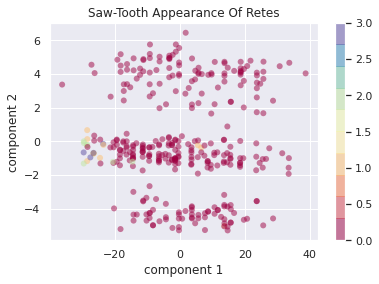

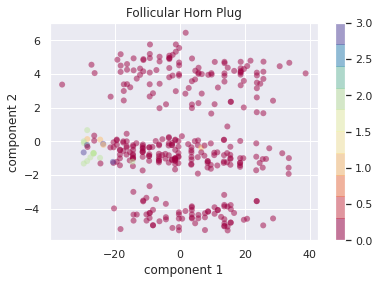

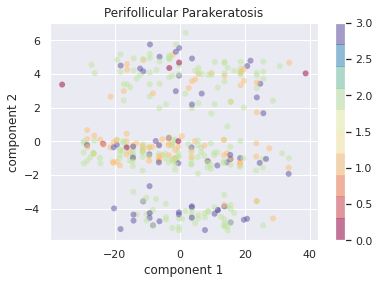

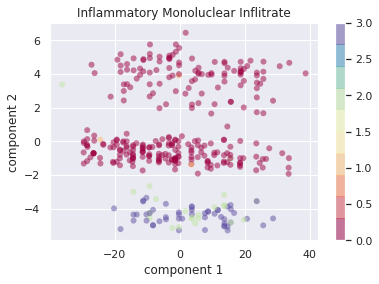

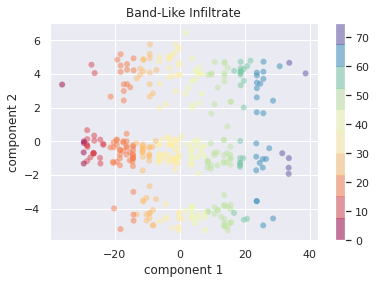

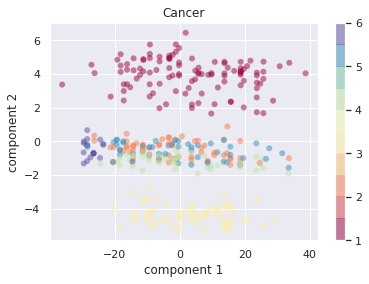

In [14]:
# Vou percorrer todas as categorias só com a finalidade de encontrar o que separa os 6 tipos de cancer de pele

for features in feature_names:
    plt.scatter(projected[:, 0], projected[:, 1],
                c=liver_data[features], edgecolor='none', alpha=0.5,
                cmap=plt.cm.get_cmap('Spectral', 10))
    plt.title(features)
    plt.xlabel('component 1')
    plt.ylabel('component 2')
    plt.colorbar()
    plt.savefig("Images/" + str(features).title()+ ".png")
    plt.show()
    plt.close()
    

Número de Componentes: 3
Valor obtido: 0.95301 %


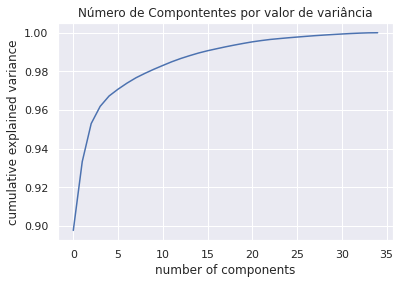

In [15]:
#Choosing the number of components

pca = PCA().fit(liver_data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title("Número de Compontentes por valor de variância")
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

numero_de_componentes = 1
for porcentagem in np.cumsum(pca.explained_variance_ratio_):
    if(porcentagem > 0.94):
        print("Número de Componentes: {}\nValor obtido: {:.5} %".format(numero_de_componentes,  porcentagem))
        break
    numero_de_componentes += 1


In [16]:
## first, get the loading scores
for numero in range(numero_de_componentes):
    loading_scores = pd.Series(pca.components_[numero], index=feature_names)
    ## now sort the loading scores based on their magnitude
    sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)

    # get the names of the top 10 genes
    top_10_genes = sorted_loading_scores[0:3].index.values

    ## print the gene names and their scores (and +/- sign)
    print("\n-------------------------------------\nPCA" + str(numero + 1) + "\n" + str(loading_scores[top_10_genes]))


-------------------------------------
PCA1
Band-Like Infiltrate    0.998866
Cancer                 -0.027652
Follicular Papules     -0.014273
dtype: float64

-------------------------------------
PCA2
Clubbing Of The Rete Ridges    0.296307
Cancer                        -0.295841
Parakeratosis                  0.293272
dtype: float64

-------------------------------------
PCA3
Cancer                                -0.391662
Inflammatory Monoluclear Inflitrate    0.316532
Disappearance Of The Granular Layer    0.274302
dtype: float64
